# Holographic Pentagon Code Demo

The purpose of this jupyter notebook is to showcase the capabilities and usage of the Holographic_Code_Library to code Holographic Pentagon Codes.

This work was done by Esteban Vindas Prado in 2023, under the context of the course CS191 at UC Berkeley.

In [1]:
import tensornetwork as tn
import numpy as np
from Holograpic_Code_Library import *

# 0. Creating a pentagons and qubits

In [2]:
# In the vector matrix representation, the pentagon operator is store in the variable pentagon_operator
print(pentagon_operator)

[[ 0.5  0.   0.  -0.5  0.  -0.5 -0.5  0. ]
 [ 0.   0.5 -0.5  0.  -0.5  0.   0.  -0.5]
 [ 0.   0.5  0.5  0.  -0.5  0.   0.   0.5]
 [-0.5  0.   0.  -0.5  0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0.  -0.5  0.   0.  -0.5]
 [ 0.5  0.   0.  -0.5  0.   0.5  0.5  0. ]
 [-0.5  0.   0.  -0.5  0.  -0.5  0.5  0. ]
 [ 0.  -0.5 -0.5  0.  -0.5  0.   0.   0.5]]


In [3]:
# Convert this operator into a tensor:
pentagon = tn.Node(np.array(pentagon_operator).transpose().reshape(2, 2, 2, 2, 2, 2))
# (This is the general scheme to convert a matrix operator to a tensor)

print(pentagon.tensor)

[[[[[[ 0.5  0. ]
     [ 0.  -0.5]]

    [[ 0.   0.5]
     [-0.5  0. ]]]


   [[[ 0.   0.5]
     [ 0.5  0. ]]

    [[-0.5  0. ]
     [ 0.  -0.5]]]]



  [[[[ 0.  -0.5]
     [ 0.5  0. ]]

    [[ 0.5  0. ]
     [ 0.  -0.5]]]


   [[[-0.5  0. ]
     [ 0.  -0.5]]

    [[ 0.  -0.5]
     [-0.5  0. ]]]]]




 [[[[[ 0.  -0.5]
     [-0.5  0. ]]

    [[-0.5  0. ]
     [ 0.  -0.5]]]


   [[[-0.5  0. ]
     [ 0.   0.5]]

    [[ 0.   0.5]
     [-0.5  0. ]]]]



  [[[[-0.5  0. ]
     [ 0.  -0.5]]

    [[ 0.   0.5]
     [ 0.5  0. ]]]


   [[[ 0.  -0.5]
     [ 0.5  0. ]]

    [[-0.5  0. ]
     [ 0.   0.5]]]]]]


In [4]:
# A qubit state in the vector-matrix representation is given a 2 element np.array:
qubit = np.array([1, 0])

# A qubit in the tensor network represetion:
qubit_node = tn.Node(np.array([1, 0]))
qubit = qubit_node[0]

# Since qubits only have one leg, it is convenient to refer to the only leg of the qubit_node, as the qubit. 
# This is merely a convention that is used in this code and in the documentation of the TensorNetwork library.

# 1. Zero Layer Holographic Pentagon Code

A zero layer holographic pentagon code only has one pentagon and it is equivalent to the pentagon gate. I include this example in the vector-matrix representation and in the tensor network representaiton because it is very simple and I hope it can give you a sense of what is going on layer, when we add more layers.

If you are already familiar with tensor networks, I would recomment to skip this section.

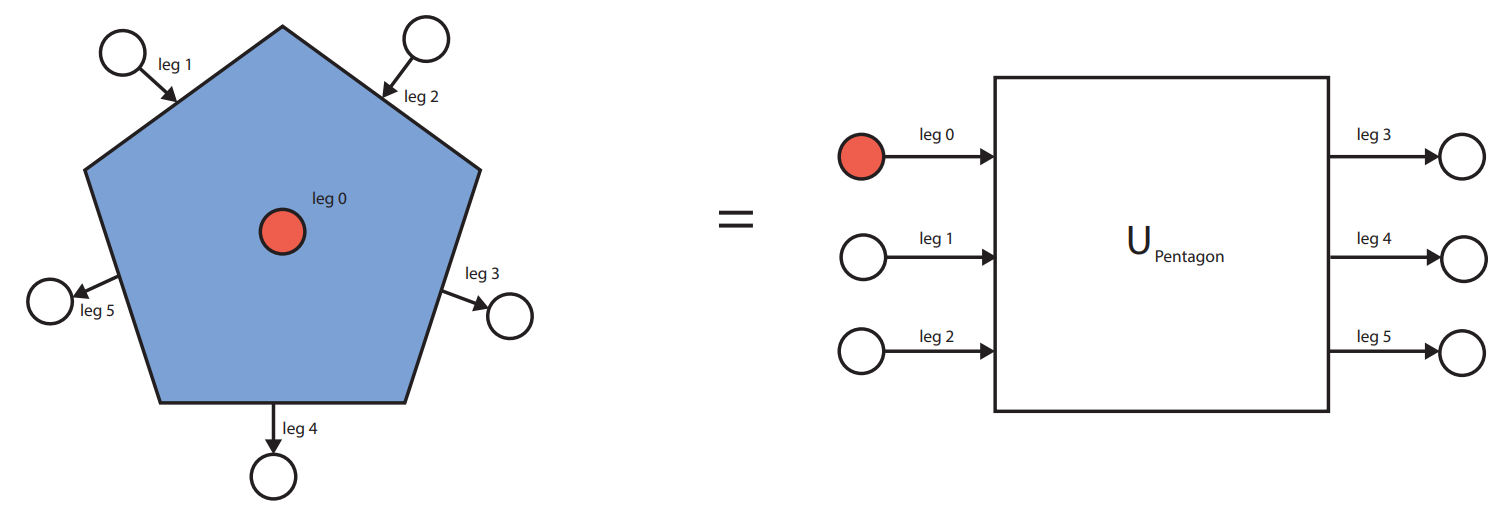

## 1.1. Getting the Ouput from a Ground State

In [5]:
# Defining some useful constants:
ground_state = np.array([1, 0])
X = np.array([[0, 1], [1, 0]]) # X operator
I = np.eye(2)

### 1.1.1. Vector-Matrix approach

In [6]:
# Define a vector state of 3 qubits in the ground state
qubits = tensor_product([ground_state, ground_state, ground_state])

result_1 = np.matmul(pentagon_operator, qubits)

In [7]:
print(result_1)

[ 0.5  0.   0.  -0.5  0.   0.5 -0.5  0. ]


### 1.1.2. Tensor network approach

In [8]:
# Define an array of 3 qubits in ground state
qubits = [new_qubit(ground_state) for _ in range(3)]

# Define a pentagon tensor
pentagon = new_pentagon()

# Connect the qubits to the legs of the pentagon:
network = TN()
network.connect(qubits[0], pentagon[0])
network.connect(qubits[1], pentagon[1])
network.connect(qubits[2], pentagon[2])

result_2 = network.get_result().tensor.flatten()

In [9]:
print(result_2)

[ 0.5  0.   0.  -0.5  0.   0.5 -0.5  0. ]


In [10]:
np.array_equal(result_1, result_2)

True

This confirms that both approaches yeild the same result.

We can also add an operator to the bulk qubit. The bulk qubit is represented by the red qubit. In vector-matrix notation, it is the first qubit, and in the tensor netowork notation, it is the qubit that we connect to the leg 0 of the pentagon tensor.

## 1.2. Applying an Operator to the Bulk Qubit

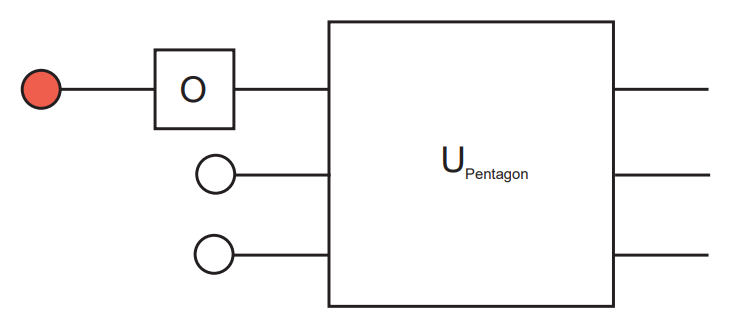

Similary, to help build an intuition of what is going on, I will do this in the vector-matrix formalism and then in the tensor network formalism.

### 1.2.1. Applying an Operator (Vector-Matrix Approach)

In [11]:
# Define the operator that we are applying to the bulk qubit.
# In this case we apply an X gate, which can be considered exciting the state
OPERATOR = X

In [12]:
# Define a vector state of 3 qubits in the ground state
qubits = [ground_state for _ in range(3)]

# Apply an operator to the first qubit:
qubits[0] = np.matmul(OPERATOR, qubits[0])

# Write qubit states as one vector
qubits = tensor_product(qubits)

result_1 = np.matmul(pentagon_operator, qubits)

In [13]:
print(result_1)

[ 0.  -0.5 -0.5  0.  -0.5  0.   0.  -0.5]


### 1.2.2. Applying an Operator (Tensor-Network Approach)

In [14]:
# Convert the operator to a node 
operator = operator_to_node(OPERATOR)

qubits = [new_qubit(ground_state) for _ in range(3)] # create 3 new qubits in the ground state
pentagon = new_pentagon() # Create a new pentagon

# Connect everything:
network = TN()

# notice how we connect the qubit 0 to the "left" leg (leg 0) of the operator
network.connect(qubits[0], operator[0])
# And we connect the "right leg" (leg 1) of the operator to first "left leg" of the pentagon (leg 0)
network.connect(operator[1], pentagon[0])
network.connect(qubits[1], pentagon[1])
network.connect(qubits[2], pentagon[2])

result_2 = network.get_result().tensor.flatten()

In [15]:
print(result_2)

[ 0.  -0.5 -0.5  0.  -0.5  0.   0.  -0.5]


In [16]:
np.array_equal(result_1, result_2)

True

## 1.3. Operator Pushing

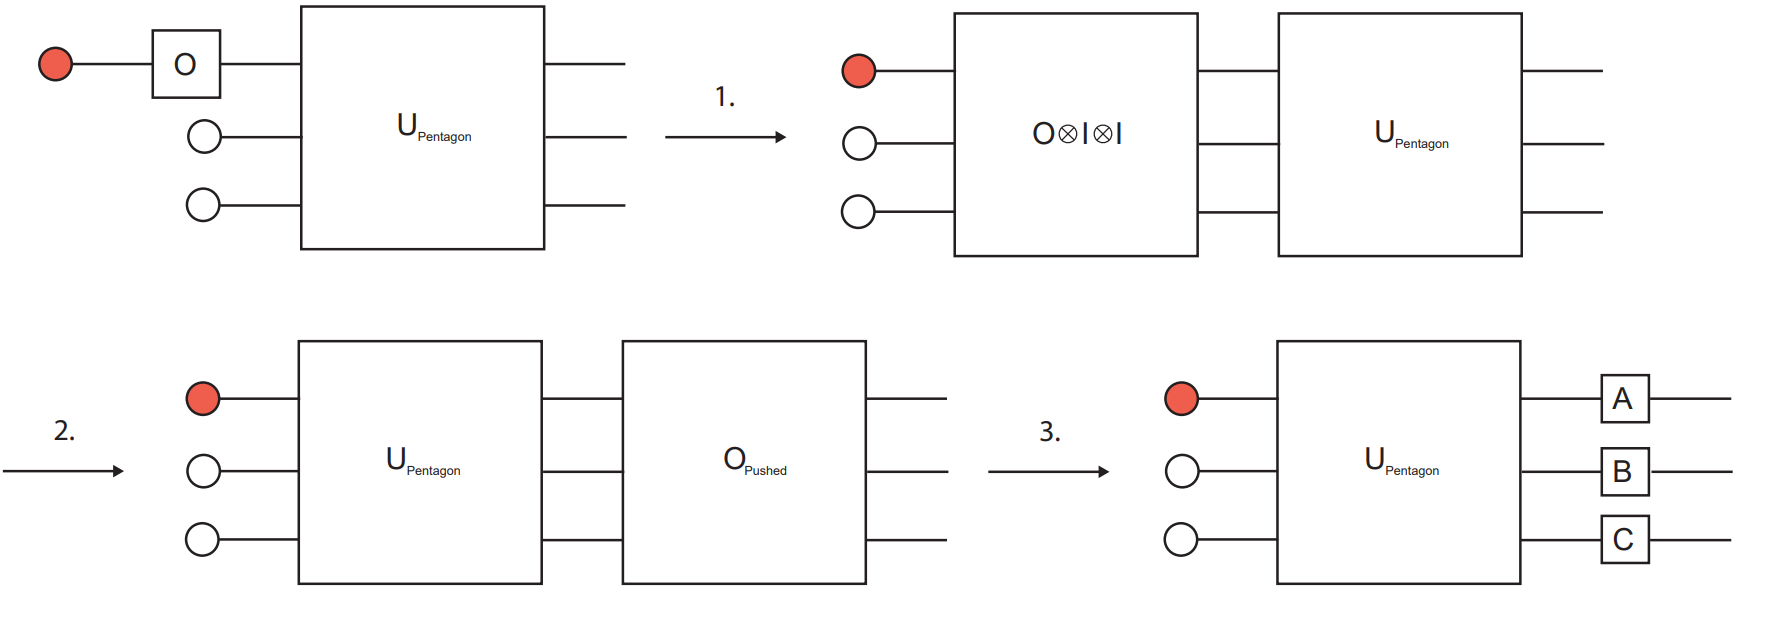

### 1.3.1. Operator Pushing (Vector-Matrix Approach)

In [17]:
# Define a vector state of 3 qubits in the ground state
qubits = [ground_state for _ in range(3)]
# Write qubit states as one vector
qubits = tensor_product(qubits)

# Get pushed operator
operator = tensor_product([OPERATOR, I, I])
pushed_operator = get_pushed_operator(operator)

result_1_pushed = np.matmul(pushed_operator, np.matmul(pentagon_operator, qubits))

In [18]:
print(result_1_pushed)

[ 0.  -0.5 -0.5  0.  -0.5  0.   0.  -0.5]


### 1.3.2. Operator Pushing (Tensor Network Approach)

In [19]:
pentagon = new_pentagon() # A pentagon gate
qubit_nodes = [tn.Node(ground_state) for _ in range(3)] # 3 qubits in ground state
qubits = [qubit_node[0] for qubit_node in qubit_nodes]

operator = tensor_product([OPERATOR, I, I]) # operator = OPERATOR ⊗ I ⊗ I

# Obtain pushed operator:
pushed_operator = get_pushed_operator(operator)
pushed_tensor = tn.Node(operator_to_tensor(pushed_operator))

# Connect everything:
network = TN()
network.connect(qubits[0], pentagon[0])
network.connect(qubits[1], pentagon[1])
network.connect(qubits[2], pentagon[2])
network.connect(pentagon[3], pushed_tensor[0])
network.connect(pentagon[4], pushed_tensor[1])
network.connect(pentagon[5], pushed_tensor[2])

result_2_pushed = network.get_result().tensor.flatten()

In [20]:
print(result_2_pushed)

[ 0.  -0.5 -0.5  0.  -0.5  0.   0.  -0.5]


In [21]:
# Compare both approaches for pushing the operator
print(np.array_equal(result_1_pushed, result_2_pushed))

# Compare the results of the "unpushed" operator from the previous section vs. pushed operator
print(np.array_equal(result_2, result_2_pushed))

True
True


# 2. One Layer Holographic Pentagon Code (HPC)

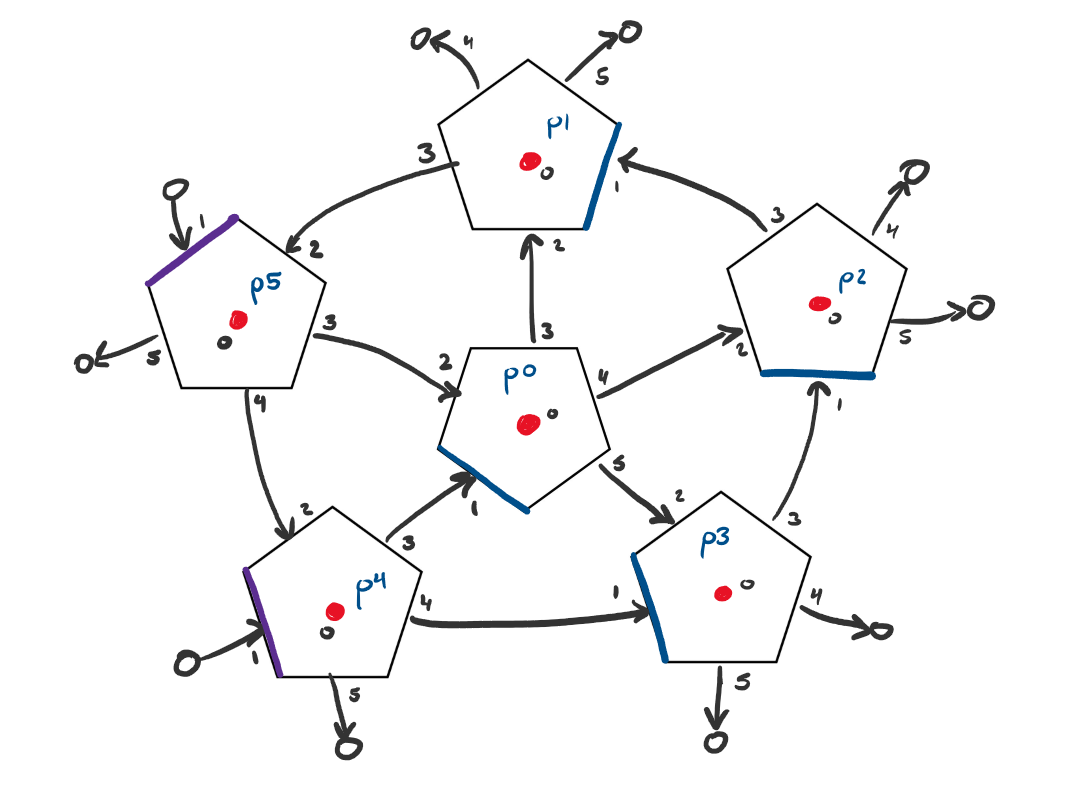

## 2.1. Operator Pushing on a one layer HPC

In the following examples, the result will not be a state vector, but a tensor network. To give it an input, the resulting tensor network can be contracted with qubits.

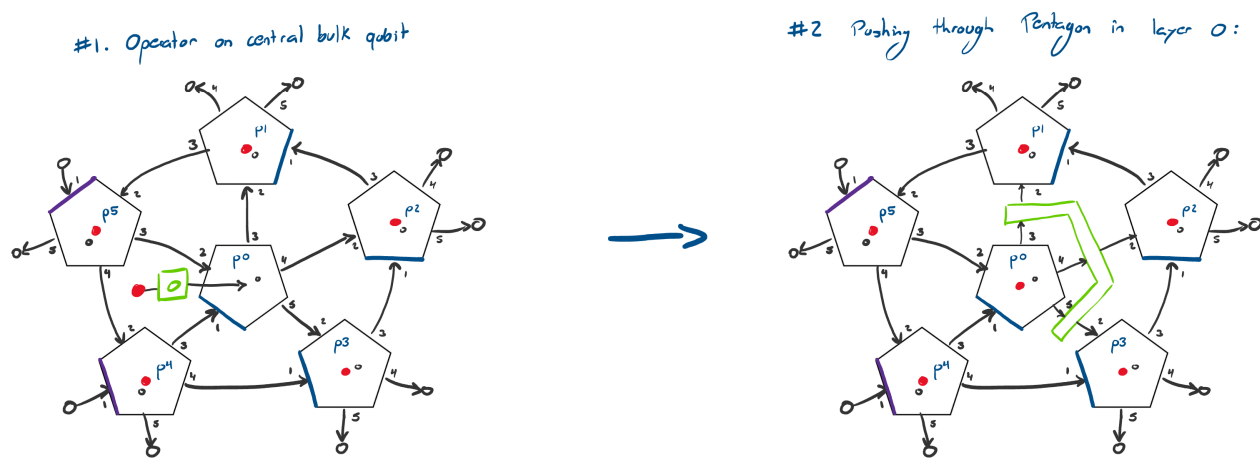
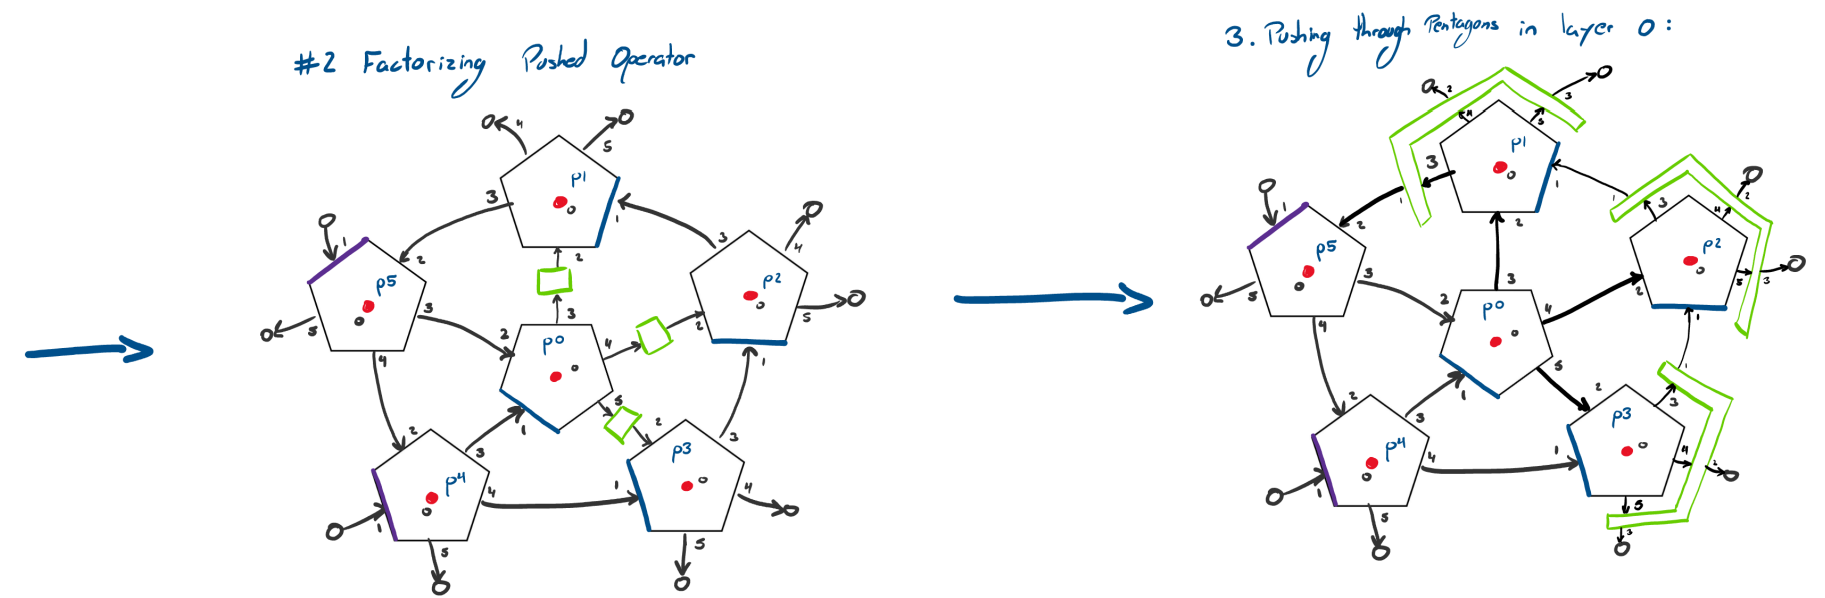

In [22]:
# Define the operator that we are applying to the bulk qubit.
# In this case we apply an X gate, which can be considered exciting the state
OPERATOR = X

### 2.1.1. Unpushed Operator

In [23]:
operator = tensor_product([OPERATOR, I, I])

# An "operator to the left" means that we contract the incoming legs of the pentagon
# with the outgoing legs of the operator
pentagon_0 = new_pentagon_with_operator_to_the_left(operator)
pentagon_1 = new_pentagon()
pentagon_2 = new_pentagon()
pentagon_3 = new_pentagon()
pentagon_4 = new_pentagon()
pentagon_5 = new_pentagon()

# Connect everything:
network = TN()
network.connect(pentagon_0[3], pentagon_1[2])
network.connect(pentagon_0[4], pentagon_2[2])
network.connect(pentagon_0[5], pentagon_3[2])
network.connect(pentagon_0[1], pentagon_4[3])
network.connect(pentagon_0[2], pentagon_5[3])

network.connect(pentagon_1[3], pentagon_5[2])
network.connect(pentagon_2[3], pentagon_1[1])
network.connect(pentagon_3[3], pentagon_2[1])

network.connect(pentagon_4[4], pentagon_3[1])
network.connect(pentagon_5[4], pentagon_4[2])

result_unpushed = network.get_result() 

### 3. Push through 1 pentagon, factorize pushed operator, push through other three pentagons

In [25]:
operator = tensor_product([OPERATOR, I, I])

# --------------- The following steps are consistent with the figure above --------------------

# ----- 1. Get the pushed operators when pushing through central pentagon (layer 0): ----- 
pushed_operator_0 = get_pushed_operator(operator)

# Factorize pushed operator, so that we can push the three resulting factors each through another pentagon
pushed_operator_0_factors = factorize_operator(pushed_operator_0)


# ----- 2. Get factorized operators as 3-qubit gates -----
operator_1 = tensor_product([I, I, pushed_operator_0_factors[0]])
operator_2 = tensor_product([I, I, pushed_operator_0_factors[1]])
operator_3 = tensor_product([I, I, pushed_operator_0_factors[2]])
# Notice how in this case, the operator = I ⊗ I ⊗ OPERATOR.
# This is because the pushed operators are connected to third leg (leg 2) of the pentagons in layer 1 (!!!)

# ----- 3. Get the pushed operators when pushing through pentagons in layer 1: ----- 

pushed_operator_1 = get_pushed_operator(operator_1)
pushed_operator_2 = get_pushed_operator(operator_2)
pushed_operator_3 = get_pushed_operator(operator_3)

# --------------- ---------------

# ----- Create the pentagons ----- 

pentagon_0 = new_pentagon()
# new_pentagon_with_operator_to_the_right(.) connects the outgoing legs of a pentagon with the incoming legs of an operator
pentagon_1 = new_pentagon_with_operator_to_the_right(pushed_operator_1) 
pentagon_2 = new_pentagon_with_operator_to_the_right(pushed_operator_2)
pentagon_3 = new_pentagon_with_operator_to_the_right(pushed_operator_3)
pentagon_4 = new_pentagon()
pentagon_5 = new_pentagon()

# ----- Connect everything -----
network = TN()
network.connect(pentagon_0[3], pentagon_1[2])
network.connect(pentagon_0[4], pentagon_2[2])
network.connect(pentagon_0[5], pentagon_3[2])
network.connect(pentagon_0[1], pentagon_4[3])
network.connect(pentagon_0[2], pentagon_5[3])

network.connect(pentagon_1[3], pentagon_5[2])
network.connect(pentagon_2[3], pentagon_1[1])
network.connect(pentagon_3[3], pentagon_2[1])

network.connect(pentagon_4[4], pentagon_3[1])
network.connect(pentagon_5[4], pentagon_4[2])

result_pushed_twice = network.get_result()

network_equal(result_pushed_twice, result_unpushed)

True